<a href="https://colab.research.google.com/github/minhcong01/Baitap_AI/blob/main/PLoai_Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/drive/folders/1V8HedJNd7r70y3FB8fle5or9SiX4HcHL?usp=sharing

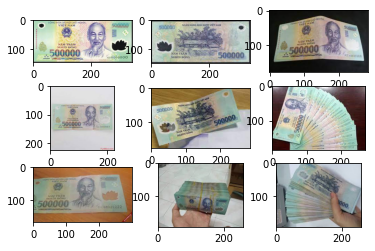

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Phanloaitien/TIEN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'500k.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Phanloaitien/TIEN/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('5k.'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50k.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100k.'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('200k.'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500k.'):
    output = 4
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('NhanDangtien_photos.npy', photos)
save('NhanDangtien_labels.npy', labels)

(51, 150, 150, 3) (51,)


In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=50, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [42]:
model.save('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')

In [43]:
from keras.models import load_model
models=load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')

Ảnh: 5k.


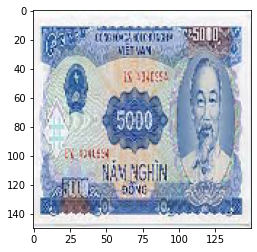

In [44]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')
img = load_img('/content/drive/MyDrive/Phanloaitien/test/5k.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['5k.','50k.','100k.','200k.','500k.']
print('Ảnh:',a[pred])

Ảnh: 50k.


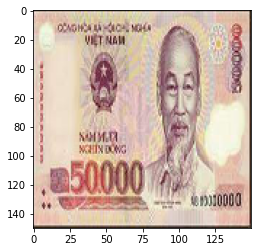

In [45]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')
img = load_img('/content/drive/MyDrive/Phanloaitien/test/50k.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['5k.','50k.','100k.','200k.','500k.']
print('Ảnh:',a[pred])

Ảnh: 100k.


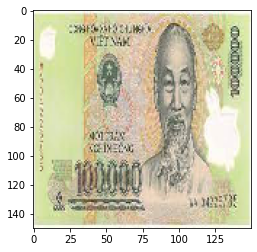

In [49]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')
img = load_img('/content/drive/MyDrive/Phanloaitien/test/100k.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['5k.','50k.','100k.','200k.','500k.']
print('Ảnh:',a[pred])

Ảnh: 200k.


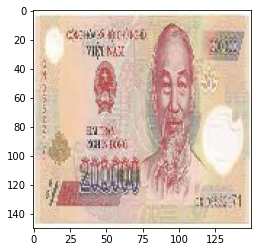

In [50]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')
img = load_img('/content/drive/MyDrive/Phanloaitien/test/200k.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['5k.','50k.','100k.','200k.','500k.']
print('Ảnh:',a[pred])

Ảnh: 500k.


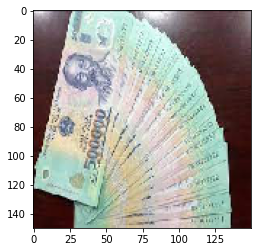

In [48]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/Phanloaitien/NhanDangtien.h5')
img = load_img('/content/drive/MyDrive/Phanloaitien/test/500k.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['5k.','50k.','100k.','200k.','500k.']
print('Ảnh:',a[pred])